![](../img/b14_wrangling.png)

<div style="page-break-after: always;"></div> 

# 데이터 정제 및 분석 기본

<img src="https://www.tomasbeuzen.com/python-programming-for-data-science/_static/logo.png" alt="python for data science" width="300" height="300">

1. 데이터 정제

2. 데이터프레임 탐색

3. 데이터프레임 기본 조작

4. 데이터프레임 재구성

5. 복수 데이터프레임 작업

6. 데이터프레임 응용 조작

<div style="page-break-after: always;"></div> 

## 학습 목표

- `df.head()`, `df.tail()`, `df.info()`, `df.describe()`로 데이터프레임을 검토할 수 있다. 
- `df.info()` 및 `df.describe()`로 데이터프레임을 요약할 수 있다. 
- `pd.set_option("display.max_rows", n)`으로 판다스 설정을 변경하고  
  주피터에서 데이터프레임이 출력되는 방식을 조작할 수 있다.  
- `df.rename()` 함수 및 `df.columns` 속성을 써서 데이터프레임 열 이름을 변경할 수 있다. 
- `df.set_index()`, `df.reset_index()` , `df.index`, `df.index.name` 등을 활용하여  
  데이터프레임의 인덱스 이름과 값을 변경할 수 있다. 
- `df.melt()` 및 `df.pivot()`으로 데이터프레임의 재구성하여  
  **깔끔한**(tidy) 데이터프레임을 만들 수 있다. 
- `df.merge()` 및 `pd.concat()`으로 데이터프레임을 결합할 수 있다. 
- `df.apply()` 및 `df.applymap()`으로 데이터프레임에 함수를 적용할 수 있다. 
- `df.groupby()` 및 `df.agg()`로 그룹별로 집계 작업을 수행할 수 있다. 
- `df.agg()`로 그룹별 혹은 전체의 요약 통계치를 구할 수 있다. 
- `df.dropna()` 및 `df.fillna()`로 데이터프레임에서 결측치를 제거하거나 대체할 수 있다. 

<div style="page-break-after: always;"></div> 

## 1. 데이터 랭글링

- 랭글링(wrangling)은 다툼, 승강이, 논쟁 등을 의미한다. 

- 다음은 모두 비슷한 의미로 쓰이는 용어이다: 
  - 데이터 랭글링(data wrangling)
  - 데이터 정제(cleansing)
  - 데이터 멍잉(data munging)
  - 데이터 전처리(preprocessing)   

- 데이터 랭글링은    
  원자료(raw data)를 변환 혹은 매핑함으로써  
  본격적인 데이터 분석을 위한  
  준비 작업을 수행하는 과정이다.

- 데이터 정제는 데이터의 품질을 향상함으로써  
  유의미한 결과를 산출하도록 도와주는 전처리 작업이다. 

- 데이터 랭글링은 다음과 같이 5 단계로 구분한다:
    1. 자료를 수집(gather)한다.
    2. 자료의 품질을 평가(assess)한다. 
    3. 자료를 정제(cleanse)한다.
    4. 자료의 품질을 재평가(reassess)하여 필요하다면 앞의 1~3 단계를 반복한다.
    5. 자료를 저장(store) 혹은 배포한다.   

- 데이터 랭글링 절차를 다음과 같이 6 단계로 보는 견해도 있다:  
  1. 탐색
  2. 구조화
  3. 정제 
  4. 보완 
  5. 검증 
  6. 배포

- 데이터 랭글링의 의미와 절차를 공부했다.  
  데이터프레임 탐색부터 시작하자. 

<div style="page-break-after: always;"></div> 

## 2. 데이터프레임 탐색

- 앞선 장에서는 데이터프레임 생성 방법을 주로 공부하였다.  
  이번 장에서는 데이터프레임을 검토하고 조작하는 방법을 주로 공부한다. 

In [1]:
import numpy as np
import pandas as pd

- 데이터프레임 탐색에 대한 공부의 첫 소주제로서  
  헤드 및 테일을 확인하는 방법을 공부해보자. 

<div style="page-break-after: always;"></div> 

### 2.1 헤드 및 테일

- `.head()` 및 `.tail()` 메소드를 써서  
  데이터프레임 앞/뒤 *n* (기본값 5) 행을 확인할 수 있다. 
- 앞 장에서 공부하던 자전거 통근 데이터셋을 다시 적재하자. 

In [2]:
df = pd.read_csv('../data/cycling_data.csv')
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- 기본값이 적용되면 5 행이 출력되지만, 이 수치는 마음대로 지정할 수 있다.  
  앞 부분에서 10 행을 확인해보자. 

In [3]:
df.head(10)

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
5,"16 Sep 2019, 13:57:48",Morning Ride,Ride,2272,12.45,Rested after the weekend!
6,"17 Sep 2019, 00:15:47",Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
7,"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
8,"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
9,"18 Sep 2019, 00:15:52",Afternoon Ride,Ride,2101,12.48,Pumped up tires


- 이번에는, 뒷 부분에서 5 행을 살펴보자. 

In [4]:
df.tail()

,Date,Name,Type,Time,Distance,Comments
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


- 2.1 절에서는 헤드 및 테일을 확인하는 방법을 공부했다. 
- 2.2 절에서는 데이터프레임의 요약 정보를 확인하는 방법을 공부하자. 

### 2.2 데이터프레임 요약

- 데이터프레임 요약에 사용되는 유용한 속성과 함수가 있다. 
    - `.shape`
    - `.info()`
    - `.describe()`

- `.shape` 속성은 넘파이 배열에서와 같은 것이다. 데이터프레임의 (행, 열) 개수를 알려준다:

In [5]:
df.shape

(33, 6)

- `.info()` 함수는 데이터프레임에 관한 정보(자료형, 메모리 소비량, 널 아닌 값 개수)를 출력한다. 

In [6]:
df.info()  # Distance 열에는 널 값이 2 개 포함되었음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      33 non-null     object 
 1   Name      33 non-null     object 
 2   Type      33 non-null     object 
 3   Time      33 non-null     int64  
 4   Distance  31 non-null     float64
 5   Comments  33 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ KB


- `.describe()` 함수는 데이터프레임에 포함된 값에 대한 요약 통계량을 제공한다. 

In [7]:
df.describe()

,Time,Distance
count,33.000000,31.000000
mean,3512.787879,12.667419
std,8003.309233,0.428618
min,1712.000000,11.790000
25%,1863.000000,12.480000
50%,2118.000000,12.620000
75%,2285.000000,12.750000
max,48062.000000,14.570000


- 기본값 설정에 의하여, `.describe()` 함수는 오직 수치 열에 대해서만 요약 통계량을 제공한다. 
- `include='all'` 인자를 지정하면 모든 열에 대한 요약 통계량을 볼 수 있다. 

In [8]:
df.describe(include='all')

,Date,Name,Type,Time,Distance,Comments
count,33,33,33,33.000000,31.000000,33
unique,33,2,1,NaN,NaN,25
top,"24 Sep 2019, 13:41:24",Afternoon Ride,Ride,NaN,NaN,Feeling good
freq,1,17,33,NaN,NaN,3
mean,NaN,NaN,NaN,3512.787879,12.667419,NaN
std,NaN,NaN,NaN,8003.309233,0.428618,NaN
min,NaN,NaN,NaN,1712.000000,11.790000,NaN
25%,NaN,NaN,NaN,1863.000000,12.480000,NaN
50%,NaN,NaN,NaN,2118.000000,12.620000,NaN
75%,NaN,NaN,NaN,2285.000000,12.750000,NaN


- 2.2 절에서는 데이터프레임 요약 방법을 공부했다. 
- 2.3 절에서는 데이터프레임 출력 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

### 2.3 데이터프레임 출력

- 데이터프레임을 알아보기 쉽게 출력하는 작업은 매우 중요하다. 
- 행이 60 개를 초과하면, 판다스가 자동적으로 앞/뒤 5 행만 출력한다. 

In [9]:
pd.DataFrame(np.random.rand(61))

,0
0,0.615001
1,0.548487
2,0.109452
3,0.480387
4,0.104629
...,...
56,0.723381
57,0.746299
58,0.481419
59,0.154276


- 행이 60 개 이하이면, 판다스가 전체 행을 모두 출력한다. 

In [10]:
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
5,"16 Sep 2019, 13:57:48",Morning Ride,Ride,2272,12.45,Rested after the weekend!
6,"17 Sep 2019, 00:15:47",Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
7,"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
8,"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
9,"18 Sep 2019, 00:15:52",Afternoon Ride,Ride,2101,12.48,Pumped up tires


- 기본 한계치 60 개는 다소 크게 설정되었다. 한계치는 20 개 정도가 적당하다.  
  `pd.set_option("display.max_rows", 20)` 명령으로 이를 조정할 수 있다. 

In [11]:
pd.set_option("display.max_rows", 20)
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 변경 가능한 출력 설정값이 많은데, 한 번에 출력할 열 개수, 값의 출력 형식 등이다.  
  [공식 문서](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#options-and-settings)를 참고하라. 
- 판다스가 테이블을 출력하는 스타일에 관한 설정 방법을 소개한다. 
  - 음수 값을 강조한다든가, 추가적인 조건에 따라서 색상을 변경한다든가 할 수 있다.  
  - 아래 예제에서는 음수에서 양수까지 범위를 보라색에서 노란색으로 지정하여 출력하였다. 
  - [스타일 지정 방법](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Styling)을 참고하라. 
- 열 이름에 "feature"라는 단어를 썼는데, 이는 "특징" 또는 "속성"이라는 의미이다.  

In [12]:
test = pd.DataFrame(np.random.randn(5, 5),
                    index = [f"row_{i}" for i in range(5)],
                    columns = [f"feature_{j}" for j in range(5)])
test.style.background_gradient(cmap='plasma')  # 표 배경색 속성을 설정

,feature_0,feature_1,feature_2,feature_3,feature_4
row_0,0.078169,-0.150292,-1.574247,0.623017,-0.383508
row_1,-0.404130,-0.006892,1.777739,0.031978,0.133668
row_2,-0.624916,-1.308829,0.063660,1.529831,1.521614
row_3,-1.485361,1.229223,-0.060049,0.815910,-0.351260
row_4,-0.098864,0.331465,0.147047,0.095448,-1.906036


- 2.3 절에서는 데이터프레임 출력 방법을 공부했다. 
- 2.4 절에서는 뷰와 복사본의 차이점을 공부하자. 

<div style="page-break-after: always;"></div> 

### 2.4 뷰와 복사본

- 직전 장에서 뷰와 복사본에 대해서 공부했었다.  
    - 뷰(view)는 존재하는 객체의 부분적 "모습"이라 할 수 있다.
    - 복사본(copy)은 객체를 메모리의 다른 영역에 새롭게 복사한 것이라 할 수 있다.
    - 이 설명은 판다스 문서에서 [Returning a view versus a copy](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy) 부분을 인용한 것이다. 
- 우리가 작성한 코드의 실행 결과로 뷰가 반환되는지 아니면 복사본이 반환되는지를 구분할 수 있어야 한다.  
  판다스에서 자주 접하는 `SettingWithCopy`(복사본에 값을 지정)라는 경고는  
  "복사본에 값을 지정하려고 시도하고 있는데, 이는 당신이 원하는 결과가 아닐 수 있다"는 경고이다. 
- 아래 예제를 통해 이에 대해 공부하자.  
  우리의 데이터프레임에서 `Time` 열에는 이상치(outlier)가 하나 포함되어 있음을 확인하라. 

In [13]:
df[df['Time'] > 4000]  # 몇천 수준을 넘는 이상치 확인

,Date,Name,Type,Time,Distance,Comments
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good


- 이 이상치를 `2000`으로 수정한다고 가정해보자.  
  아래와 같은 코드를 작성할 수 있다. 

In [14]:
df[df['Time'] > 4000]['Time'] = 2000  # SettingWithCopyWarning 

<ipython-input-14-5052e4d64c19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Time'] > 4000]['Time'] = 2000  # SettingWithCopyWarning


- `SettingWithCopy` 경고가 떴다. 데이터프레임의 값은 변경되었을까? 

In [15]:
df[df['Time'] > 4000]  # 이상치 다시 확인

,Date,Name,Type,Time,Distance,Comments
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good


- 데이터프레임의 (원본) 값은 변함이 없다. 
    - `df[df['Time'] > 4000]` 코드의 실행 결과는 복사본으로 반환된다. 
    - 반환되는 실행 결과가 원본인지 복사본인지는 `id()` 함수로 확인할 수 있다. 

In [16]:
print(f"The id of the original dataframe is: {id(df)}")
print(f" The id of the indexed dataframe is: {id(df[df['Time'] > 4000])}")

The id of the original dataframe is: 3182764719552
 The id of the indexed dataframe is: 3182780793136


- 직전 코드에서 원본의 `id()` 값과 다른 값이 출력되는 것을 보면, 이는 복사본이다. 
    - 복사본에 대해서 `['Time'] = 2000`라는 지정 명령을 수행한 것이다. 
    - 판다스는 이런 상황이 문제가 될 수 있다는 점을 알고, 경고한 것이다. 
    - 이 문제를 해결하려면, `.loc[]`를 써서 인덱싱을 수행해야 한다. 

In [17]:
df.loc[df['Time'] > 4000, 'Time'] = 2000  # .loc[] 인덱싱으로 값 수정 시도

- 어떤 오류도 발생하지 않았다. 값이 변경되었는지 확인하자.

In [18]:
df[df['Time'] > 4000]  # 값이 변경되었음

,Date,Name,Type,Time,Distance,Comments


- 반환값이 뷰인지 복사본일지 애매할 경우에는,  
  `.copy()` 메소드로 복사본을 반환하라고 명시적으로 요구할 수 있다. 

In [19]:
df2 = df[df['Time'] > 4000].copy()  # 명시적으로 복사본을 요구

- 데이터프레임의 탐색 방법을 공부했고,  
  데이터프레임의 기본 조작 방법을 공부하자. 
<div style="page-break-after: always;"></div> 

## 3. 데이터프레임 기본 조작

### 3.1 열 이름 변경

- 열 이름을 변경하는 방법은 두 가지이다:
  1. `.rename()` 메소드를 써서 특정 열 이름을 선택적으로 변경
  2. `.columns` 속성을 써서 모든 열 이름을 일괄 변경

- `.rename()` 메소드로 특정 열 이름 변경을 시도해 보자. 

In [20]:
df.columns

Index(['Date', 'Name', 'Type', 'Time', 'Distance', 'Comments'], dtype='object')

In [21]:
df.rename(columns={"Date": "Datetime",    # 특정 열 이름 변경 지시, 결과는 실패?
                   "Comments": "Notes"})
df.columns

Index(['Date', 'Name', 'Type', 'Time', 'Distance', 'Comments'], dtype='object')

- 원본 변경은 실패했다. 복사본을 만들어서 이를 변경했기 때문에, 원본은 불변이다. 
- 원본을 변경하는 방법은 두 가지이다: 
    1. `inplace=True` 인자를 지정한다.  
       예를 들어서 `df.rename(..., inplace=True)`와 같이 작성한다.  
       대부분의 함수 및 메소드에서 이 방법을 적용할 수 있다. 
    2. 원본에 다시 지정한다.  
       예를 들어서 `df = df.rename(...)`
- 판다스에서는 **다시 지정하는 방법 2를 추천**한다.  
  이를 추천하는 [몇 가지 이유](https://www.youtube.com/watch?v=hK6o_TDXXN8&t=700)가 있다.  
  대체로 메모리 할당과 관련한 이유이다. 

In [22]:
df = df.rename(columns={"Date": "Datetime",     # 재 지정하여 원본의 특정 열 이름 변경에 성공
                        "Comments": "Notes"})
df.columns

Index(['Datetime', 'Name', 'Type', 'Time', 'Distance', 'Notes'], dtype='object')

- `.columns` 속성을 사용하여, 모든 열 이름을 변경한다. 

In [23]:
df.columns = [f"열 {c}" for c in range(1, 7)]  # 재 지정하여 원본의 전체 열 이름 변경에 성공 
df.columns

Index(['열 1', '열 2', '열 3', '열 4', '열 5', '열 6'], dtype='object')

- 3.1 절에서는 열 이름 변경 방법을 공부했다. 
- 3.2 절에서는 인덱스 변경 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

### 3.2 인덱스 변경

- 인덱스를 변경하는 방법은 네 가지이다: 
    1. `.set_index()` 메소드를 써서, 데이터프레임 열 중의 하나를 인덱스 열로 지정한다. 
    2. `df.index.name` 속성을 직접 지정하여, 인덱스 이름을 변경한다. 
    3. `.reset_index()` 메소드를 써서, 현재의 인덱스 열을 일반 열로 전환하면  
       인덱스는 0부터 시작하는 정수 레이블로 초기화된다. 
    4. `.index` 속성을 써서, 이를 직접 수정한다. 

In [24]:
df

,열 1,열 2,열 3,열 4,열 5,열 6
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- `set_index()`로 `열 1`을 인덱스로 설정하고, `.index.name`을 "새 인덱스"로 변경해 보자. 

In [25]:
df = df.set_index("열 1")
df.index.name = "새 인덱스"
df

,열 2,열 3,열 4,열 5,열 6
새 인덱스,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- `.reset_index()`로 인덱스를 (정수 레이블로) 초기화하면, "새 인덱스"는 다시 일반 열로 전환된다. 

In [26]:
df = df.reset_index()
df

,새 인덱스,열 2,열 3,열 4,열 5,열 6
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 열 이름과 유사하게, 인덱스를 직접 수정할 수도 있다.  
  그렇지만 이렇게 하는 경우는 드믈고, 일반적으로는 기존 열 중에서 하나를 `.set_index()` 메소드로 지정한다. 

In [27]:
df.index

RangeIndex(start=0, stop=33, step=1)

In [28]:
df.index = range(100, 133, 1)  # 기존 인덱스는 일반 열로 전환됨
df

,새 인덱스,열 2,열 3,열 4,열 5,열 6
100,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
101,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
102,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
103,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
104,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
128,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
129,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
130,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
131,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 3.2 절에서는 인덱스 변경 방법을 공부했다. 
- 3.3 절에서는 열 추가/삭제 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

### 3.3 열 추가 및 삭제

- 데이터프레임 열을 추가하거나 삭제하는 방법은 두 가지이다: 
    1. `[]`를 써서 열을 추가한다. 
    2. `.drop()`를 써서 열을 삭제한다. 
- 자전거 통근 데이터셋을 다시 읽고 시작하자. 

In [29]:
df = pd.read_csv('../data/cycling_data.csv')
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 데이터프레임에 새로운 열을 추가하려면, `df["새 열 이름"]`에 값이나 식을 지정한다. 

In [30]:
df['Rider'] = '신교수'
df['Avg Speed'] = df['Distance'] * 1000 / df['Time']  # avg. speed in m/s
df

,Date,Name,Type,Time,Distance,Comments,Rider,Avg Speed
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain,신교수,6.055662
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain,신교수,5.148163
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather,신교수,6.720344
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise,신교수,5.857664
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week,신교수,6.599683
...,...,...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind",신교수,6.754011
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good,신교수,5.909725
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!,신교수,6.838675
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise,신교수,5.192854


- 데이터프레임에서 기존 열을 삭제하려면, `.drop()` 메소드를 사용한다. 

In [31]:
df = df.drop(columns=['Rider', 'Avg Speed'])
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 3.3 절에서는 열 추가/삭제 방법을 공부했다.
- 3.4 절에서는 행 추가/삭제 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

### 3.4 행 추가 및 삭제

- 데이터프레임에 수작업으로 행을 추가하는 일은 매우 드믈다.  
  그보다는 원본 데이터 파일에 데이터 행을 추가하는 경우가 일반적이다.  
  또한 다른 데이터프레임과 병합하거나 조인하여 행을 추가하게 된다. 
- 행 추가/삭제 방법은 두 가지이다:
    1. `.append()`로 행 추가
    2. `.drop()`로 행 삭제

In [32]:
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 데이터프레임의 뒷 부분에 새 행을 추가해 보자. 

In [33]:
새_행 = pd.DataFrame([["12 Oct 2019, 00:10:57", "Morning Ride", "Ride",
                        2331, 12.67, "Washed and oiled bike last night"]],
                     columns = df.columns,
                     index = [33])
df = df.append(새_행)
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


- `.drop()` 메소드로 특정 범위 인덱스를 지정하여 행을 삭제해 보자. 

In [34]:
df.drop(index=range(30, 34))

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
25,"2 Oct 2019, 13:46:06",Morning Ride,Ride,2134,13.06,Bit tired today but good weather
26,"3 Oct 2019, 00:45:22",Afternoon Ride,Ride,1724,12.52,Feeling good
27,"3 Oct 2019, 13:47:36",Morning Ride,Ride,2182,12.68,Wet road
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"


- 데이터프레임을 조작하는 기본적 방법을 공부했다.  
  이제 데이터프레임의 구조를 변경하는 재구성 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

## 4. 데이터프레임 재구성

- 2014년에 게재된 [Tidy data](https://vita.had.co.nz/papers/tidy-data.pdf)라는 논문은 "데이터셋의 구조를 데이터의 의미와 연결"하자는 내용이다.  
  이를 다음과 같이 정의할 수 있다: 
  1. 개별 변수로 열을 구성하라. 
  2. 개별 관측으로 행을 구성하라. 
  3. 단위 관측 집합으로 테이블을 구성하라.  
- 경우에 따라서는,  
  데이터프레임의 모양을 변경하는 재구성(reshape) 작업을 통하여  
  깔금한 데이터(tidy data)로 만들어야 한다. 

|![그림 1. 깔끔한 데이터(tidy data)](../img/chapter8/tidy.png)<br>그림 1. 깔끔한 데이터(tidy data) <br>출처: [r4ds](https://r4ds.had.co.nz/tidy-data.html#fig:tidy-structure)|
|:---|    



- 데이터프레임 재구성 방법은 다음과 같다: 
    - `.melt()`: 넓은 데이터를 길게 만든다. 
    - `.pivot()`: 긴 데이터를 넓게 만든다.
    - `.pivot_table()`: `.pivot()`과 동일하지만, 복수 인덱스를 다룰 수 있다. 
    
|![그림 2. `.melt()`로 길어지고, `.pivot()`으로 넓어지는, 데이터 재구성](../img/chapter8/melt_pivot.gif)<br>그림 2. `.melt()`로 길어지고, `.pivot()`으로 넓어지는, 데이터 재구성<br>출처: [Garrick Aden-Buie's GitHub](https://github.com/gadenbuie/tidyexplain#spread-and-gather)|
|:---|    




- 데이터프레임 재구성의 개념을 소개했다.  
- 4.1 절에서는 멜트 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

### 4.1 멜트

- 아래 데이터는 연도마다 교수들이 강의한 과목 개수를 기록한 것이다.
  - 당신의 질문이 "연도마다 강의한 과목 개수가 변화하는가?"라면  
    아래와 같은 구조는 깔끔한 데이터로 인정하기 어렵다.  
  - 아래와 같은 구조는 원 데이터라기 보다는 집계된 데이터로 보아야 한다. 
  - 관찰 데이터 한 건이 발생할 때마다,  
    독립적인 한 행으로 추가할 수 있는 구조여야 바람직하다.
  - `.melt()`를 써서 긴(long) 데이터로 재구성해야 한다. 

In [35]:
df = pd.DataFrame({"Name": ["Tom", "Mike", "Tiffany", "Varada", "Joel"],
                   "2018": [1, 3, 4, 5, 3],
                   "2019": [2, 4, 3, 2, 1],
                   "2020": [5, 2, 4, 4, 3]})
df

,Name,2018,2019,2020
0,Tom,1,2,5
1,Mike,3,4,2
2,Tiffany,4,3,4
3,Varada,5,2,4
4,Joel,3,1,3


- `.melt()`를 써서, 이 데이터를 깔끔하게 만들어 보자. 
  - `.melt()` 메소드에는 인자를 몇 개 지정해야 한다. 
  - `id_vars` 인자가 가장 중요한데, 어느 열이 "식별자"인지를 지정한다. 

In [36]:
df_melt = df.melt(id_vars="Name",        # 식별자 열의 이름
                  var_name="Year",       # 멜트 작업 결과로 생성되는 키 열의 이름
                  value_name="Courses")  # 멜트 작업 결과에서 데이터 열의 이름
df_melt  # .melt() 메소드로 깔끔하게 재구성한 결과를 확인 

,Name,Year,Courses
0,Tom,2018,1
1,Mike,2018,3
2,Tiffany,2018,4
3,Varada,2018,5
4,Joel,2018,3
5,Tom,2019,2
6,Mike,2019,4
7,Tiffany,2019,3
8,Varada,2019,2
9,Joel,2019,1


- `value_vars` 인자로 "melt" 작업 대상을 제한할 수 있다. 
  - 이 인자를 생략하면 모든 비식별 열이 작업 대상에 포함된다. 
  - 아래에서는 `2018` 열을 "melt" 작업 대상에서 제외해 보자.

In [37]:
df.melt(id_vars="Name",               # 식별자 열 이름 
        value_vars=["2019", "2020"],  # 멜트 작업 범위에 포함시킬 열
        var_name="Year",              # 멜트 작업 결과로 생성되는 키 열 이름
        value_name="Courses")         # 멜트 작업 결과에서 데이터 열 이름

,Name,Year,Courses
0,Tom,2019,2
1,Mike,2019,4
2,Tiffany,2019,3
3,Varada,2019,2
4,Joel,2019,1
5,Tom,2020,5
6,Mike,2020,2
7,Tiffany,2020,4
8,Varada,2020,4
9,Joel,2020,3


- 4.1 절에서는 멜트 방법을 공부했다.
- 4.2 절에서는 피벗 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

### 4.2 피벗

- `.pivot()` 메소드로 (단일 키 열로) 긴(long) 데이터를 (여러 변수 열로) 넓은(wide) 모양으로 만들 수 있다.  
  이렇게 넓은 모양의 데이터는 집계된 데이터 형식으로 볼 수 있다. 
  - `index` 인자: index 행을 구성할 열
  - `columns` 인자: 다수 열로 분할될 열
  - `values` 인자: 피벗의 행렬을 구성할 데이터 열 

In [38]:
df_pivot = df_melt.pivot(index="Name",      # index 행을 구성할 열
                         columns="Year",    # 다수 열로 분할될 열 
                         values="Courses")  # 피벗의 행렬을 구성할 데이터 열
df_pivot  # (이름 x 연도) 형식으로 집계된 피벗 데이터                              

Year,2018,2019,2020
Name,,,
Joel,3,1,3
Mike,3,4,2
Tiffany,4,3,4
Tom,1,2,5
Varada,5,2,4


- 결국 원 데이터를  
  `.melt()`로 긴 모양의 깔끔한 데이터로 변환하였다가,  
  `.pivot()`으로 넓은 모양의 집계된 데이터로 복원한 셈이다.
- 피벗 결과로 만들어지는 첫 열은 열의 대표 이름과 행(인덱스)의 이름을 함께 가진다.  
  그런데 이 모습은 원 데이터의 모습과는 약간 다르다.  
  이 모습을 원 데이터의 모습과 동일하게 만들어 보자: 

In [39]:
df_pivot = df_pivot.reset_index()  # 현재 인덱스를 일반 열로 전환하고 새롭게 정수 레이블로 인덱스 재설정
df_pivot.columns.name = None       # 인덱스 열 이름이 `Year`가 되지 않도록 
df_pivot

,Name,2018,2019,2020
0,Joel,3,1,3
1,Mike,3,4,2
2,Tiffany,4,3,4
3,Tom,1,2,5
4,Varada,5,2,4


- 이번에는 (반대로), 연도를 행으로, 이름을 열로 지정하여 피벗(집계)을 시도해 보자. 

In [40]:
df_melt  # 깔금한 긴 데이터프레임 확인

,Name,Year,Courses
0,Tom,2018,1
1,Mike,2018,3
2,Tiffany,2018,4
3,Varada,2018,5
4,Joel,2018,3
5,Tom,2019,2
6,Mike,2019,4
7,Tiffany,2019,3
8,Varada,2019,2
9,Joel,2019,1


In [41]:
df_melt.pivot(index='Year', 
              columns='Name', 
              values='Courses')  # (연도x이름) 형태 집계

Name,Joel,Mike,Tiffany,Tom,Varada
Year,,,,,
2018,3,3,4,1,5
2019,1,4,3,2,2
2020,3,2,4,5,4


- `.pivot()` 메소드는 다음과 같은 상황에서 작동하지 않는다:
  - 인덱스를 복수로 지정하고 싶은 경우
  - 인덱스/열 레이블에 중복이 있는 경우
- 이런 상황에서는 `.pivot_table()`을 써야 한다.  
  이를 자세히 설명하지는 않을 예정이다.  
  우선 `.pivot()` 메소드를 익히는 데 집중하기 바라는 까닭이다. 

In [42]:
df = pd.DataFrame({"Name": ["Tom", "Tom", "Mike", "Mike"],
                   "Department": ["CS", "STATS", "CS", "STATS"],  # 학과 열 추가
                   "2018": [1, 2, 3, 1],
                   "2019": [2, 3, 4, 2],
                   "2020": [5, 1, 2, 2]}).melt(id_vars=["Name", "Department"],  # 녹여서 길게
                                               var_name="Year", 
                                               value_name="Courses")
df

,Name,Department,Year,Courses
0,Tom,CS,2018,1
1,Tom,STATS,2018,2
2,Mike,CS,2018,3
3,Mike,STATS,2018,1
4,Tom,CS,2019,2
5,Tom,STATS,2019,3
6,Mike,CS,2019,4
7,Mike,STATS,2019,2
8,Tom,CS,2020,5
9,Tom,STATS,2020,1


- 이 경우에, `Name` 열에 중복된 값이 있으므로,  
  `pivot()` 메소드는 사용할 수 없고,  
  `ValueError: Index contains duplicate entries, cannot reshape` 오류가 발생한다. 
- 해결 방안은 두 가지이다. 
  - `Name` 열에 존재하는 중복된 값을 집계 처리
  - `Name` 및 `Department` 열을 복수 인덱스로 지정 처리 

In [43]:
df.pivot(index="Name",      # Name 열에 중복된 값으로 오류 발생
         columns="Year",
         values="Courses")

ValueError: Index contains duplicate entries, cannot reshape

- `.pivot_table()` 메소드를 써서, 중복 값에 대한 집계 처리를 할 수 있다. 
  - 이 메소드는 중복된 값에 대하여 집계 함수(aggregation function)를 적용한다. 
  - 지금과 같은 상황이라면 집계 함수 `sum()`을 적용해야 한다. 

In [44]:
df.pivot_table(index="Name", columns='Year', values='Courses', aggfunc='sum')

Year,2018,2019,2020
Name,,,
Mike,4,6,4
Tom,3,5,6


- `.pivot_table()` 메소드를 써서, 다수 인덱스를 지정 처리할 수 있다. 
  - `Name` 및 `Department`를 모두 인덱스로 지정한다. 
  - 이렇게 하면, 특정 이름의 교수가 특정 학과에서 맡은 강좌 개수를 확인하는 개념이다. 

In [45]:
df.pivot_table(index=["Name", "Department"],  # 다수 인덱스 지정 
               columns='Year', 
               values='Courses')

Year             2018  2019  2020
Name Department                  
Mike CS             3     4     2
     STATS          1     2     2
Tom  CS             1     2     5
     STATS          2     3     1

- 직전 결과는 다수-인덱스 또는 "계층적으로 인덱스" 처리된 데이터프레임을 보여준다.  
  - 이에 대해서는 뒤에서 더 자세히 설명할 예정이다.
  - [`pivot_table()`에 대한 판다스 공식 문서](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#pivot-tables)를 참고하라.  

- 데이터프레임 재구성 방법에 이어서,   
  복수 데이터프레임을 다루는 방법에 대하여 공부하자. 

<div style="page-break-after: always;"></div> 

## 5. 복수 데이터프레임 작업

- 복수 데이터프레임을 병합 혹은 조인해야 하는 경우가 있다: 
  - `df.merge()` 및 `df.concat()`
  - [데이터프레밍의 결합에 관한 판다스 공식 문서](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)는 쉽고도 유용한 참고 자료이다. 
- 아래에 소개하는 예제는  
  Jenny Bryan의 STAT 545 웹 사이트에서 [Chapter 15](https://stat545.com/join-cheatsheet.html) 부분을 변형한 것이다. 

- 복수 데이터프레임 작업의 개념을 소개했다.  
- 5.1 절에서 데이터프레임 병합 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

### 5.1 데이터프레임 병합

- `pd.concat()`를 써서 데이터프레임을 병합할 수 있다. 
  - 수직 병합: 병합 대상 데이터프레임들이 **동일한 열**을 가지고 있는 경우
  - 수평 병합: 병합 대상 데이터프레임들이 **동일한 행**을 가지고 있는 경우

In [46]:
df1 = pd.DataFrame({'A': [1, 3, 5],
                    'B': [2, 4, 6]})
df2 = pd.DataFrame({'A': [7, 9, 11],
                    'B': [8, 10, 12]})

In [47]:
df1

,A,B
0,1,2
1,3,4
2,5,6


In [48]:
df2

,A,B
0,7,8
1,9,10
2,11,12


In [49]:
# 두 데이터프레임의 열이 동일하므로, 수직 병합 대상 
pd.concat((df1, df2), axis=0)  # axis=0 수직 병합

,A,B
0,1,2
1,3,4
2,5,6
0,7,8
1,9,10
2,11,12


- 직전 결과에서, 인덱스는 단순히 병합되어, 원래의 인덱스를 보존하고 있다.  
- `ignore_index=True` 인자를 지정하여 인덱스를 초기화 가능하다. 

In [50]:
pd.concat((df1, df2), axis=0, 
          ignore_index=True)  # 인덱스 초기화

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12


- `axis=1` 인자를 지정하여 수평 병합이 가능하다.  
  동일한 열을 가지고 있는 데이터프레임을 수평 병합하면 열 레이블이 초기화된다. 

In [51]:
pd.concat((df1, df2), 
          axis=1,             # 수평 병합
          ignore_index=True)

,0,1,2,3
0,1,2,7,8
1,3,4,9,10
2,5,6,11,12


- 병합(concatenate) 작업을 세 개 이상의 데이터프레임을 대상으로 진행할 수도 있다: 

In [52]:
pd.concat((df1, df2, df1, df2), axis=0, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12
6,1,2
7,3,4
8,5,6
9,7,8


- 5.1 절에서 데이터프레임 병합 방법을 공부했다.
- 5.2 절에서 데이터프레임 조인 방법을 공부하자.

<div style="page-break-after: always;"></div> 

### 5.2 데이터프레임 조인

- `pd.merge()` 메소드를 써서 데이터테이블을 "조인"(join) 할 수 있다.  
  - `pd.merge()` 메소드는 SQL 조인 연산과 유사하다. 
  - 공통되는 `키(key)` 열을 기반으로 조인하게 된다.
- `pd.merge()` 메소드로 다음 유형의 조인이 가능하다: 
  - 내부 조인(inner join)
  - 외부 조인(outer join)
  - 왼쪽 조인(left join)
  - 오른쪽 조인(right join) 
- 다음 참고 자료들은 훌륭하다.
  - [조인 유형에 관한 판다스 공식 문서](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join)
  - [조인 유형에 관한 에니메이션 설명](https://github.com/gadenbuie/tidyexplain)

In [53]:
df1 = pd.DataFrame({"name": ['Magneto', 'Storm', 'Mystique', 'Batman', 'Joker', 'Catwoman', 'Hellboy'],
                    'alignment': ['bad', 'good', 'bad', 'good', 'bad', 'bad', 'good'],
                    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'male'],
                    'publisher': ['Marvel', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'Dark Horse Comics']})
df2 = pd.DataFrame({'publisher': ['DC', 'Marvel', 'Image'],
                    'year_founded': [1934, 1939, 1992]})

|![그림 3. `publisher` 열로 연결된 저자와 출판사 데이터프레임](../img/chapter8/join.png)<br>그림 3. `publisher` 열로 연결된 저자와 출판사 데이터프레임|
|:---|

- df1은 저자 데이터프레임이고, df2는 출판사 데이터프레임이다. 
    - 두 데이터프레임(테이블)에 공통되는 `publisher` 열이 조인 연산의 키(key) 열이다. 
    - 관계형 데이터베이스에서는 정규화 원칙에 의하여 이와 같이 테이블이 분리되어 저장되어야 한다.
    - 그런데, 특정 상황에서는 테이블 조인이 필요하다. 
      - 저자 정보를 출판사 정보와 연계하여 보여주어야 하는 경우
      - 출판사 정보를 저자 정보와 연계하여 보여주어야 하는 경우      

- 내부 조인은 df1과 df2에서 양쪽의 키 값이 일치하는 행만 반환한다. 
  - 아래 실행 결과에는,  
    저자와 출판사의 정보가 함께 출력되어 있다. 
  - "Hellboy"라는 저자의 정보는 내부 조인 결과에 누락되었다.  
    해당 저자의 출판사는 "Dark Horse Comics"인데, 이 출판사는 df2에 존재하지 않는다. 
  - "Image"라는 출판사의 정보도 내부 조인 결과에 누락되었다.  
    해당 출판사로 등록된 저자가 df1에 존재하지 않는다. 
  - 내부 조인에서는 양쪽 데이터프레임에서 공통적으로 존재하는 키 값만 조인 대상으로 포함된다.  
  

In [54]:
pd.merge(df1, df2, how="inner", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939
1,Storm,good,female,Marvel,1939
2,Mystique,bad,female,Marvel,1939
3,Batman,good,male,DC,1934
4,Joker,bad,male,DC,1934
5,Catwoman,bad,female,DC,1934


| ![그림 4. 저자 및 출판사에 대한 내부 조인 결과](../img/chapter8/inner_join.png)<br>그림 4. 저자 및 출판사에 대한 내부 조인 결과 |
| :--- |

- 외부 조인은 df1과 df2의 모든 행을 무조건 포함하여 반환한다.  
  대응되는 참조 정보가 없다면, 모두 `NaN`으로 반환된다. 

In [55]:
pd.merge(df1, df2, how="outer", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939.0
1,Storm,good,female,Marvel,1939.0
2,Mystique,bad,female,Marvel,1939.0
3,Batman,good,male,DC,1934.0
4,Joker,bad,male,DC,1934.0
5,Catwoman,bad,female,DC,1934.0
6,Hellboy,good,male,Dark Horse Comics,NaN
7,NaN,NaN,NaN,Image,1992.0


|![그림 5. 저자 및 출판사에 대한 외부 조인 결과](../img/chapter8/outer_join.png)<br>그림 5. 저자 및 출판사에 대한 외부 조인 결과|
|:---|

- 왼쪽/오른쪽 데이터만을 기준으로 외부 조인을 수행할 수도 있다. 
  - `how="left"`: 왼쪽 df1의 행은 모두 포함되며,  
    오른쪽 df2에 대응되는 참조 정보가 없다면 `NaN`으로 반환 
  - `how="right"`: 오른쪽 df2의 행은 모두 포함되며,  
    왼쪽 df1에 대응되는 참조 정보가 없다면 `NaN`으로 반환 

In [56]:
pd.merge(df1, df2, how="left", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939.0
1,Storm,good,female,Marvel,1939.0
2,Mystique,bad,female,Marvel,1939.0
3,Batman,good,male,DC,1934.0
4,Joker,bad,male,DC,1934.0
5,Catwoman,bad,female,DC,1934.0
6,Hellboy,good,male,Dark Horse Comics,NaN


|![그림 6. 저자 및 출판사에 대한 왼쪽 조인 결과](../img/chapter8/left_join.png)<br>그림 6. 저자 및 출판사에 대한 왼쪽 조인 결과|
|:---|

In [57]:
pd.merge(df1, df2, how="right", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Batman,good,male,DC,1934
1,Joker,bad,male,DC,1934
2,Catwoman,bad,female,DC,1934
3,Magneto,bad,male,Marvel,1939
4,Storm,good,female,Marvel,1939
5,Mystique,bad,female,Marvel,1939
6,NaN,NaN,NaN,Image,1992


- `pd.merge()` 메소드로 데이터프레임 조인 연산을 수행할 때,  
  조인 연산의 키 열을 지정하는 방법은 다양하다. 
  - 앞에서 본 예제에서는,  
    `on` 인자로 양쪽에 공통되는 키 열을 지정했지만,  
    인덱스 값으로 키를 지정할 수도 있고   
    (같은 변수 값을 저장하고 있지만) 이름은 서로 다른 열을 키로 지정할 수도 있다.
  - `indicator` 인자로  
    어느 쪽(양쪽, 왼쪽만 또는 오른쪽만)에서 조인되었는지 
    출력하라고 요구할 수도 있다. 

In [58]:
pd.merge(df1, df2, how="outer", on="publisher", indicator=True)

,name,alignment,gender,publisher,year_founded,_merge
0,Magneto,bad,male,Marvel,1939.0,both
1,Storm,good,female,Marvel,1939.0,both
2,Mystique,bad,female,Marvel,1939.0,both
3,Batman,good,male,DC,1934.0,both
4,Joker,bad,male,DC,1934.0,both
5,Catwoman,bad,female,DC,1934.0,both
6,Hellboy,good,male,Dark Horse Comics,NaN,left_only
7,NaN,NaN,NaN,Image,1992.0,right_only


- `pd.concat()` 메소드에도 내부 조인이나 외부 조인을 지정하는 인자가 있다.  
  - 하지만 이 방법은 양쪽의 키 열에 의하여 조인을 수행하는 SQL 개념과는 무관하다. 
  - 이 방법은 데이터프레임을 열 방향(`axis=1`)으로 단순 병합하는 방식이다. 
  - `pd.concat()` 메소드는   
    - 동일한 행 인덱스를 기반으로 열 방향 병합하거나,
    - 동일한 열 레이블을 기반으로 행 방향 병합하는 개념이다.  

In [59]:
df1

,name,alignment,gender,publisher
0,Magneto,bad,male,Marvel
1,Storm,good,female,Marvel
2,Mystique,bad,female,Marvel
3,Batman,good,male,DC
4,Joker,bad,male,DC
5,Catwoman,bad,female,DC
6,Hellboy,good,male,Dark Horse Comics


In [60]:
df2

,publisher,year_founded
0,DC,1934
1,Marvel,1939
2,Image,1992


In [61]:
# 기본적으로 `join="outer"` 방식 (일치하지 않는 행 인덱스에 대해서는 NaN으로 채움)
pd.concat((df1, df2), axis=1)  


,name,alignment,gender,publisher,publisher,year_founded
0,Magneto,bad,male,Marvel,DC,1934.0
1,Storm,good,female,Marvel,Marvel,1939.0
2,Mystique,bad,female,Marvel,Image,1992.0
3,Batman,good,male,DC,NaN,NaN
4,Joker,bad,male,DC,NaN,NaN
5,Catwoman,bad,female,DC,NaN,NaN
6,Hellboy,good,male,Dark Horse Comics,NaN,NaN


In [62]:
# 내부 조인 방식 (일치하는 행 인덱스에 대해서만)
pd.concat((df1, df2), axis=1, join="inner")  

,name,alignment,gender,publisher,publisher,year_founded
0,Magneto,bad,male,Marvel,DC,1934
1,Storm,good,female,Marvel,Marvel,1939
2,Mystique,bad,female,Marvel,Image,1992


- 지금까지 복수 데이터프레임을 다루는 방법을 공부했다.  
  이제부터는 데이터프레임에 대한 고급스런 조작 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

## 6. 데이터프레임 응용 조작

### 6.1 데이터프레임에 함수 적용

- 사용자 정의 함수를 데이터프레임에 적용하고 싶은 경우에는 다음 방법을 사용한다. 
  - `df.apply()`는 지정한 함수를  
    데이터프레임의 행(또는 열)마다 차례로 적용해준다.  
    함수가 배열을 전달받고 반환할 수 있어야 한다.    
  - `df.applymap()`은 지정한 함수를  
    데이터프레임의 원소마다 차례로 적용해준다.  
    함수가 단일 값을 전달받고 반환할 수 있어야 한다. 
  - `series.apply()`/`series.map()`는 데이터프레임이 아닌  
    시리즈에 대해서 동일한 작업을 수행해 준다. 

- 아래 코드는 데이터프레임의 열마다 넘파이 함수를 적용하는 예제이다. 

In [63]:
df = pd.read_csv('../data/cycling_data.csv')
df[['Time', 'Distance']].apply(np.sin)  # df의 두 열에 대하여 np.sin 함수를 적용

,Time,Distance
0,-0.901866,0.053604
1,-0.901697,0.447197
2,-0.035549,-0.046354
3,-0.739059,0.270228
4,-0.236515,-0.086263
...,...,...
28,-0.683372,0.063586
29,0.150056,0.133232
30,0.026702,0.023627
31,-0.008640,0.221770


- 사용자 정의 함수를 적용하는 것도 가능하다. 

In [64]:
def seconds_to_hours(x):
    return x / 3600

df[['Time']].apply(seconds_to_hours)

,Time
0,0.578889
1,0.703056
2,0.517500
3,0.608889
4,0.525278
...,...
28,0.519444
29,0.596944
30,0.511389
31,0.684167


- 람다 함수를 활용하면 더 나아집니다. 

In [65]:
df[['Time']].apply(lambda x: x / 3600)

,Time
0,0.578889
1,0.703056
2,0.517500
3,0.608889
4,0.525278
...,...
28,0.519444
29,0.596944
30,0.511389
31,0.684167


- 인자가 더 많은 함수에 대해서도 적용이 가능합니다.  
  `.apply()`를 호출할 때, 함수 이름 뒤에 인자를 추가로 지정하면 됩니다. 

In [66]:
def convert_seconds(x, to="hours"):
    if to == "hours":
        return x / 3600
    elif to == "minutes":
        return x / 60

df[['Time']].apply(convert_seconds, to="minutes")

,Time
0,34.733333
1,42.183333
2,31.050000
3,36.533333
4,31.516667
...,...
28,31.166667
29,35.816667
30,30.683333
31,41.050000


- 일부 함수는 단지 단일 값만을 전달받고 반환합니다. 

In [67]:
int(3.141)  # 단일값에 대한 형변환만 허용됨

3

In [68]:
float([3.141, 10.345])  # 배열에 대한 형변환은 불허됨 

TypeError: float() argument must be a string or a number, not 'list'

- `.applymap()`은 이런 상황에서 사용 가능합니다:

In [69]:
df.Time

0     2084
1     2531
2     1863
3     2192
4     1891
      ... 
28    1870
29    2149
30    1841
31    2463
32    1843
Name: Time, Length: 33, dtype: int64

In [70]:
df[['Time']].applymap(float)

,Time
0,2084.0
1,2531.0
2,1863.0
3,2192.0
4,1891.0
...,...
28,1870.0
29,2149.0
30,1841.0
31,2463.0


- 그렇지만, 이런 일반적 함수에 대해서는 대개의 경우  
  "벡터화"(vectorized) 버전이 준비되어 있기 마련이며, 이를 쓰는 것이 더 빠르다. 
- 위 경우에 대해서는 `.astype()`을 사용할 수 있으며,  
  전체 열의 자료형을 빠르게 변환한다:

In [71]:
time_applymap = %timeit  -q -o -r 3 df[['Time']].applymap(float)
time_builtin = %timeit  -q -o -r 3 df[['Time']].astype(float)
print(f"'astype'이 'applymap'보다 {time_applymap.average / time_builtin.average:.2f} 배 빠르다!")

'astype'이 'applymap'보다 2.41 배 빠르다!


- 6.1 절에서 데이터프레임에 함수를 적용하는 방법을 공부했다.
- 6.2 절에서 그룹핑 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

### 6.2 그룹핑

- 데이터에서 특정 그룹에 대해서만 관심을 가지는 경우가 있다.  
  `df.groupby()`를 쓰면 변수(들) 기반으로 데이터를 그룹으로 분류할 수 있다.

In [72]:
df = pd.read_csv('../data/cycling_data.csv')
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 여기서 `Name` 열을 기반으로 그룹을 분류하자: :

In [73]:
dfg = df.groupby(by='Name')
dfg

- `DataFrameGroupBy` 객체는 무엇인가?  
  이 객체에는 데이터프레임의 그룹에 관한 정보가 담겨있다. 

|![그림 7. `Name` 열로 그룹 분류](../img/chapter8/groupby_1.png)<br>그림 7. `Name` 열로 그룹 분류|
|:---|  

- `DataFrameGroupBy` 객체는 단지 인덱스-맾핑에 대한 사전이다.  
  아래 코드에서 `dfg.groups` 값을 확인해 보라:  
  - 사전의 키는 `df.groupby()`에서 `by` 인자로 지정한 `Name` 열의 개별 값이다. 
  - 사전의 값은 해당 `Name` 값에 매핑된 행 인덱스 값의 리스트이다.    

In [74]:
dfg.groups

{'Afternoon Ride': [0, 2, 4, 6, 9, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32], 'Morning Ride': [1, 3, 5, 7, 8, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}

- `.get_group()`을 써서 특정 그룹에 접근할 수 있다:

In [75]:
dfg.get_group('Afternoon Ride')

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
6,"17 Sep 2019, 00:15:47",Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
9,"18 Sep 2019, 00:15:52",Afternoon Ride,Ride,2101,12.48,Pumped up tires
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good
12,"20 Sep 2019, 01:02:05",Afternoon Ride,Ride,2961,12.81,Feeling good
14,"24 Sep 2019, 00:35:42",Afternoon Ride,Ride,2076,12.47,"Oiled chain, bike feels smooth"
16,"25 Sep 2019, 00:07:21",Afternoon Ride,Ride,1775,12.10,Feeling really tired
18,"26 Sep 2019, 00:13:33",Afternoon Ride,Ride,1860,12.52,raining


- 일반적인 활용 방식은 `DataFrameGroupBy` 객체에 집계(aggregate) 함수를 적용하는 것이다:

|![그림 8. `Name` 열로 그룹별 집계](../img/chapter8/groupby_2.png)<br>그림 8. `Name` 열로 그룹별 집계|
|:---|  

In [76]:
dfg.mean()  # df.groupby(by='Name').mean()

,Time,Distance
Name,,
Afternoon Ride,4654.352941,12.462
Morning Ride,2299.875000,12.860


- `.aggregate()`를 쓰면 여러 함수를 적용할 수 있다:

In [77]:
dfg.aggregate(['mean', 'sum', 'count'])

Time              Distance              
                       mean    sum count     mean     sum count
Name                                                           
Afternoon Ride  4654.352941  79124    17   12.462  186.93    15
Morning Ride    2299.875000  36798    16   12.860  205.76    16

- 심지어 특정 열에는 특정 함수만 차별적으로 적용할 수도 있다:

In [78]:
def num_range(x):
    return x.max() - x.min()

dfg.aggregate({"Time": ['max', 'min', 'mean', num_range], 
               "Distance": ['sum']})

Time                              Distance
                  max   min         mean num_range      sum
Name                                                       
Afternoon Ride  48062  1712  4654.352941     46350   186.93
Morning Ride     2903  2090  2299.875000       813   205.76

- 그런데, 그룹 분류를 적용하지 않은 데이터프레임에 대해서도 집계 메소드를 적용할 수 있다.  
  사실 이런 작업은 결국 `df.describe()`가 수행하는 작업과 유사하다:

In [79]:
df.agg(['mean', 'min', 'count', num_range])

,Date,Name,Type,Time,Distance,Comments
min,"1 Oct 2019, 00:15:07",Afternoon Ride,Ride,1712.000000,11.790000,A little tired today but good weather
count,33,33,33,33.000000,31.000000,33
mean,NaN,NaN,NaN,3512.787879,12.667419,NaN
num_range,NaN,NaN,NaN,46350.000000,2.780000,NaN


In [80]:
df.describe()

,Time,Distance
count,33.000000,31.000000
mean,3512.787879,12.667419
std,8003.309233,0.428618
min,1712.000000,11.790000
25%,1863.000000,12.480000
50%,2118.000000,12.620000
75%,2285.000000,12.750000
max,48062.000000,14.570000


- 6.2 절에서 그룹핑 방법을 공부했다.
- 6.3 절에서는 결측치 처리 방법을 공부하자. 

<div style="page-break-after: always;"></div> 

### 6.3 결측치 처리

- 결측치는 일반적으로 `NaN`으로 표시한다. 
  - `df.isnull()`을 써서 데이터프레임에 포함된 결측치를 찾아낼 수 있다. 
  - `df.isnull()`는 데이터프레임에 포함된 모든 개별 원소에 대해서 논리값을 반환한다:

In [81]:
df.isnull()

,Date,Name,Type,Time,Distance,Comments
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
28,False,False,False,False,False,False
29,False,False,False,False,False,False
30,False,False,False,False,False,False
31,False,False,False,False,False,False


- `.info()`를 쓰면 열 단위로 널 값 포함 여부를 파악하기 쉽다: 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      33 non-null     object 
 1   Name      33 non-null     object 
 2   Type      33 non-null     object 
 3   Time      33 non-null     int64  
 4   Distance  31 non-null     float64
 5   Comments  33 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ KB


- `df.isnull()`을 단독으로 쓰기보다는,  
  `.any()`와 체인 형태로 연결하여 사용하면 더 편리하다: 

In [83]:
df[df.isnull().any(axis=1)]  # 열 방향(axis=1)으로 검사하여, 행 단위로 마스킹

,Date,Name,Type,Time,Distance,Comments
22,"1 Oct 2019, 00:15:07",Afternoon Ride,Ride,1732,NaN,Legs feeling strong!
24,"2 Oct 2019, 00:13:09",Afternoon Ride,Ride,1756,NaN,A little tired today but good weather


- 결측치를 처리하는 전형적인 두 가지 방법은 다음과 같다: 
  - `df.dropna()`로 결측치를 포함한 행을 삭제
  - `df.fillna()`로 결측치를 (특정 값, 평균, 또는 직전의 널 아닌 값 등의) 적절한 값으로 대체

In [84]:
df.dropna()  # 2 행을 삭제하여 31 행이 됨

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 결측치를 대체할 때에는 열 단위로 대체할 값을 찾아야 한다.  
  열마다 다른 특성값이 저장되어 있는 까닭이다. 

In [85]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [86]:
df.fillna(0)  # 결측치를 0으로 대체

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [87]:
df.fillna(df.mean())  # 결측치를 열마다 평균으로 대체

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


In [88]:
df.fillna(method='bfill')  # 널 아닌 직후 값으로 열마다 대체

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [89]:
df.fillna(method='ffill')  # 널 아닌 직전 값으로 열마다 대체

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


- 시각화를 활용한 결측치 (패턴) 식별 방법도 유용하다.  
  - 데이터프레임을 히트맵(heatmap, 열기분포지도)으로 출력해보는 방법을 흔히 사용한다.  
  - 아래 코드를 실행하려면, 우선 차트 작성을 위한 `seaborn` 라이브러리를 설치해야 한다: 

```sh
conda install seaborn
```

In [90]:
import matplotlib.pyplot as plt       # 차트를 위한 matplotlib 라이브러리
import seaborn as sns                 # seaborn의 별칭은 관례적으로 sns로 지정
sns.set(rc={'figure.figsize':(7, 7)})  # 그림 크기 지정

In [91]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


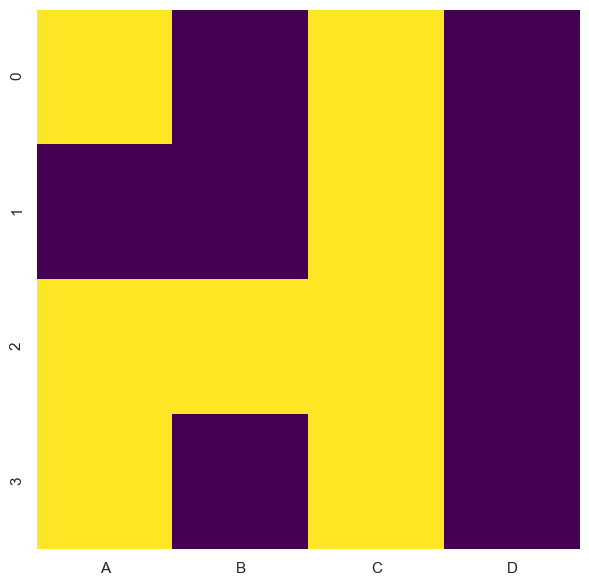

In [92]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False); # 'viridis'는 sns에서 정의되어 있는 색상 팔레트 이름
plt.show()                                             # 작성된 차트를 출력

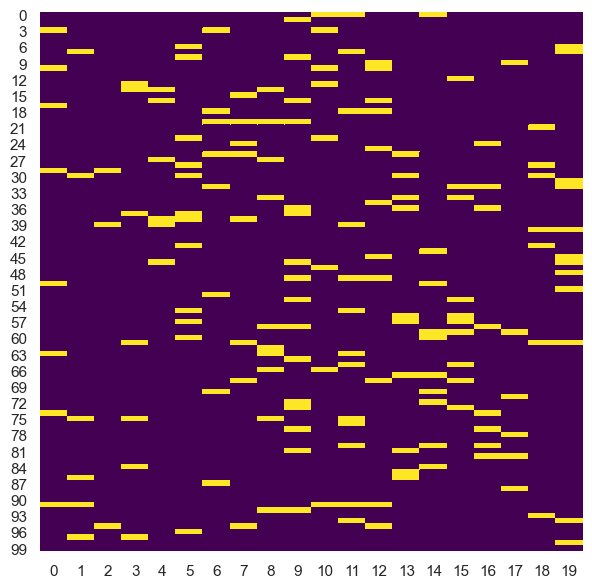

In [93]:
# 시범을 위한 가상적 데이터셋을 생성 
np.random.seed(2021)                                                  # 난수 초기값 지정
npx = np.zeros((100,20))                                              # 0을 채운 100x20 배열 생성
mask = np.random.choice([True, False], npx.shape, p=[.1, .9])         # [True, False]에서 확률 p로 npx.shape 개 임의 추출
npx[mask] = np.nan                                                    # True 인 경우에는 NaN으로 지정
sns.heatmap(pd.DataFrame(npx).isnull(), cmap='viridis', cbar=False);  # 히트맵 출력
plt.show()                                                            # 작성된 차트를 출력

- 데이터프레임에 대한 응용 조작 기법에 대한 공부를 끝으로  
  데이터 정제 및 분석 기본에 대한 공부를 모두 마친다.  
- 다음 장에서는 데이터 정제 및 분석 응용에 대하여 공부하자. 